<h1>Erfan Mohammadi & MohammadJavad Ahmadpour</h1> 
<h2>400170352 & 400104697</h2>

In [106]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [107]:
class Task:
    def __init__(self, priority, arrival_time):
        self.id = None
        self.priority = priority
        self.arrival_time = arrival_time
        self.start_service = arrival_time
        self.end_service = None
        self.done_by_car = 0

In [108]:
def create_tasks(T, t, X):
    tasks = []
    for _ in range(2):
        current_time = 0
        while True:
            inter_arrival_time = np.random.exponential(1 / X)
            current_time += inter_arrival_time
            if current_time > T:
                break
            priority = random.choice([1, 2, 3])
            new_task = Task(priority, current_time)
            tasks.append(new_task)

    current_time = 0
    priority = random.choice([1, 2, 3])
    new_task = Task(priority, current_time)
    tasks.append(new_task)
    while True:
        inter_arrival_time = np.random.exponential(1 / X)
        current_time += inter_arrival_time
        if current_time > t:
            break
        priority = random.choice([1, 2, 3])
        new_task = Task(priority, current_time)
        tasks.append(new_task)

    for i in range(len(tasks)):
        for j in range(len(tasks)):
            if tasks[i].arrival_time < tasks[j].arrival_time:
                tasks[i], tasks[j] = tasks[j], tasks[i]

    for i in range(len(tasks)):
        tasks[i].id = i
        
    return tasks

In [109]:
def simulate(tasks, l1, l2, t, T, C, N, P, policy):
    L = 0
    L_car = 0
    queue = [tasks[0]]
    last_task = 0
    current_time = 0
    processors = [None] * N
    total_time_process = [0] * N

    queue_index = 0
    queue_weight = 0
    car_queue_index = 0
    car_queue_weight = 0

    car_queue = []
    car_processor = None
    total_time_car_process = 0

    while current_time < t:
        lst = []
        for i in range(N):
            if processors[i] is None and len(queue) > 0:
                if policy == 2:
                    while True:
                        queue_index = (queue_index + 1) % len(queue)
                        if queue_index == 0:
                            if queue_weight > 0:
                                queue_weight = queue_weight - 1
                            else:
                                queue_weight = 1
                                for x in queue:
                                    if x.priority > queue_weight:
                                        queue_weight = x.priority
                        if queue[queue_index].priority >= queue_weight:
                            processors[i] = queue.pop(queue_index)
                            break
                else:
                    processors[i] = queue.pop(0)
                processors[i].start_service = current_time
                service_time = np.random.exponential(l1)
                processors[i].end_service = current_time + service_time
                total_time_process[i] += service_time

            if processors[i] is not None:
                lst.append(processors[i].end_service)

        lst.append(t)
        lst.append(tasks[last_task + 1].arrival_time)

        L += len(queue) * (min(lst) - current_time)

        current_time = min(lst)
        if current_time == tasks[last_task + 1].arrival_time:
            last_task += 1
            queue.append(tasks[last_task])
            if policy == 3:
                for i in range(len(queue)):
                    for j in range(len(queue)):
                        if queue[i].priority < queue[j].priority:
                            queue[i], queue[j] = queue[j], queue[i]


        for i in range(N):
            if processors[i] is not None and processors[i].end_service == current_time:
                processors[i] = None


    while True:
        lst = []
        for i in range(N):
            if processors[i] is None and len(queue) > 0:
                if policy == 2:
                    while True:
                        queue_index = (queue_index + 1) % len(queue)
                        if queue_index == 0:
                            if queue_weight > 0:
                                queue_weight = queue_weight - 1
                            else:
                                queue_weight = 1
                                for x in queue:
                                    if x.priority > queue_weight:
                                        queue_weight = x.priority
                        if queue[queue_index].priority >= queue_weight:
                            processors[i] = queue.pop(queue_index)
                            break
                else:
                    processors[i] = queue.pop(0)
                processors[i].start_service = current_time
                service_time = np.random.exponential(l1)
                processors[i].end_service = current_time + service_time
                total_time_process[i] += service_time

            if processors[i] is not None:
                lst.append(processors[i].end_service)


        if car_processor is None and len(car_queue) > 0:
            if policy == 2:
                while True:
                    car_queue_index = (car_queue_index + 1) % len(car_queue)
                    if car_queue_index == 0:
                        if car_queue_weight > 0:
                            car_queue_weight = car_queue_weight - 1
                        else:
                            car_queue_weight = 1
                            for x in car_queue:
                                if x.priority > car_queue_weight:
                                    car_queue_weight = x.priority
                    if car_queue[car_queue_index].priority >= car_queue_weight:
                        car_processor = car_queue.pop(car_queue_index)
                        break
            else:
                car_processor = car_queue.pop(0)
            car_processor.done_by_car = 1
            service_time = np.random.exponential(l2)
            car_processor.start_service = current_time
            car_processor.end_service = current_time + service_time
            total_time_car_process += service_time

        if car_processor is not None:
            lst.append(car_processor.end_service)


        if last_task < len(tasks) - 1:
            lst.append(tasks[last_task + 1].arrival_time)

        L += len(queue) * (min(lst) - current_time)
        L_car += len(car_queue) * (min(lst) - current_time)

        current_time = min(lst)
        if last_task < len(tasks) - 1 and current_time == tasks[last_task + 1].arrival_time:
            last_task += 1
            random_num = np.random.rand()
            if random_num < P:
                car_queue.append(tasks[last_task])
                if policy == 3:
                    for i in range(len(car_queue)):
                        for j in range(len(car_queue)):
                            if car_queue[i].priority < car_queue[j].priority:
                                car_queue[i], car_queue[j] = car_queue[j], car_queue[i]
            else:
                queue.append(tasks[last_task])
                if policy == 3:
                    for i in range(len(queue)):
                        for j in range(len(queue)):
                            if queue[i].priority < queue[j].priority:
                                queue[i], queue[j] = queue[j], queue[i]

        for i in range(N):
            if processors[i] is not None and processors[i].end_service == current_time:
                processors[i] = None

        if car_processor is not None and car_processor.end_service == current_time:
            car_processor = None

        end = 1
        if car_processor is not None:
            end = 0
        for i in range(N):
            if processors[i] is not None:
                end = 0
        if last_task < len(tasks) - 1:
            end = 0

        if end == 1:
            break

    L /= current_time
    L_car /= (current_time - t)


    W = 0
    for x in tasks:
        W += x.start_service - x.arrival_time
        if x.done_by_car == 1:
            W += C
    W /= len(tasks)


    W_queue = 0
    for x in tasks:
        if x.done_by_car == 0:
            W_queue += x.start_service - x.arrival_time
        if x.done_by_car == 1:
            W_queue += C
    W_queue /= len(tasks)


    W_car = 0
    q = 0
    for x in tasks:
        if x.done_by_car == 1:
            q += 1
            W_car += x.start_service - x.arrival_time
    if q > 0:
        W_car /= q


    for i in range(N):
        total_time_process[i] /= current_time

    total_time_car_process /= current_time - t


    lt_out = []
    for i in range(3):
        lt = []
        for x in tasks:
            if x.priority == i + 1:
                if x.done_by_car == 1:
                    lt.append(x.start_service - x.arrival_time + C)
                else:
                    lt.append(x.start_service - x.arrival_time)
        lt.sort()
        ls1 = []
        ls2 = []
        for j in range(len(lt)):
            ls1.append(lt[j])
            ls2.append((j+1)/len(lt))
        lt_out.append(ls1)
        lt_out.append(ls2)


    print("Average of queue length: " + str(L))
    print("Average of car queue length: " + str(L_car))
    print("Average time spend in all queues: " + str(W))
    print("Average time spend in queue: " + str(W_queue))
    print("Average time spend in car queue: " + str(W_car))
    for i in range(N):
        print("Performance of processor " + str(i) + " :" + str(total_time_process[i]))
    print("Performance of car processor: " + str(total_time_car_process))

    for i in range(3):
        plt.figure(figsize=(8, 6))
        plt.plot(lt_out[2*i], lt_out[2 * i + 1], marker='o', linestyle='-', color='b')
        plt.xlabel('values')
        plt.ylabel('Cumulative Probability')
        plt.title('Cumulative Distribution Function (CDF) for priority ' + str(i+1))
        plt.grid(True)
        plt.show()


In [110]:
T = 20000
t = 5000
X = 0.2
lambda1 = 3
lambda2 = 8
C = 5
N = 2
P = 0.2

In [111]:
FIFO = 1
WRR = 2
NPPS = 3

In [112]:
tasks = create_tasks(T, t, X)
tasks2 = tasks.copy()
tasks3 = tasks.copy()
tasks4 = tasks.copy()
tasks5 = tasks.copy()
tasks6 = tasks.copy()

simulate using FIFO queue
Average of queue length: 2.174325472525015
Average of car queue length: 1.3084497244128406
Average time spend in all queues: 7.622023650156757
Average time spend in queue: 5.466357798028594
Average time spend in car queue: 15.599897997410457
Performance of processor 0 :0.6639479891220962
Performance of processor 1 :0.5213185265985558
Performance of car processor: 0.6820826600069857


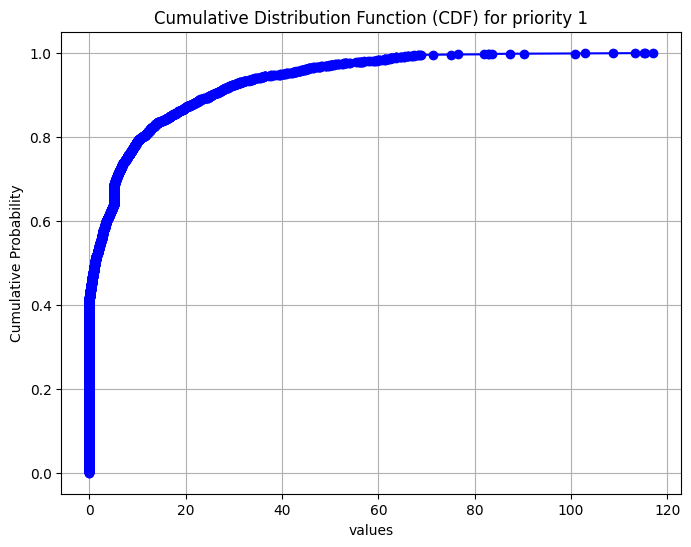

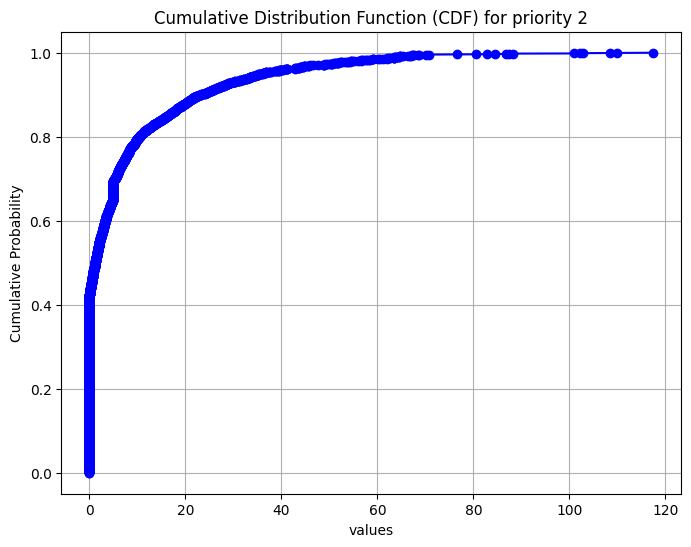

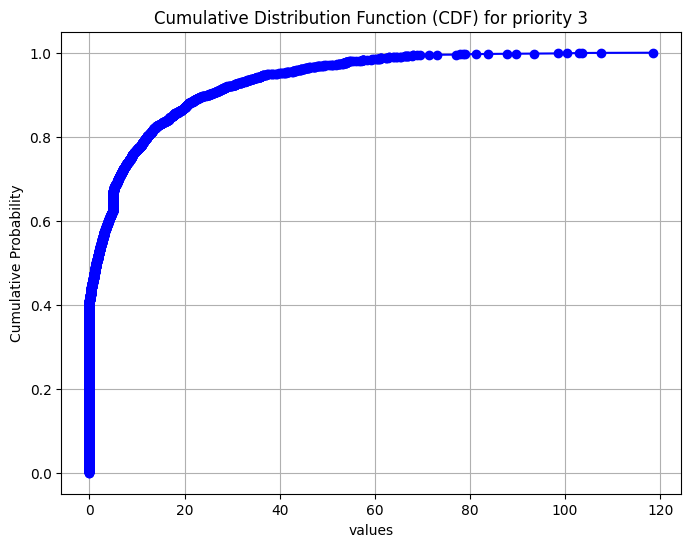

In [113]:
print("simulate using FIFO queue")
simulate(tasks, lambda1, lambda2, t, T, C, N, P, FIFO)

simulate using WRR queue
Average of queue length: 1.3027087158785626
Average of car queue length: 0.9892543571518736
Average time spend in all queues: 5.683241361064966
Average time spend in queue: 4.005495609376844
Average time spend in car queue: 6.748760063412953
Performance of processor 0 :0.6525141673001739
Performance of processor 1 :0.5096906932822668
Performance of car processor: 0.6447247925259042


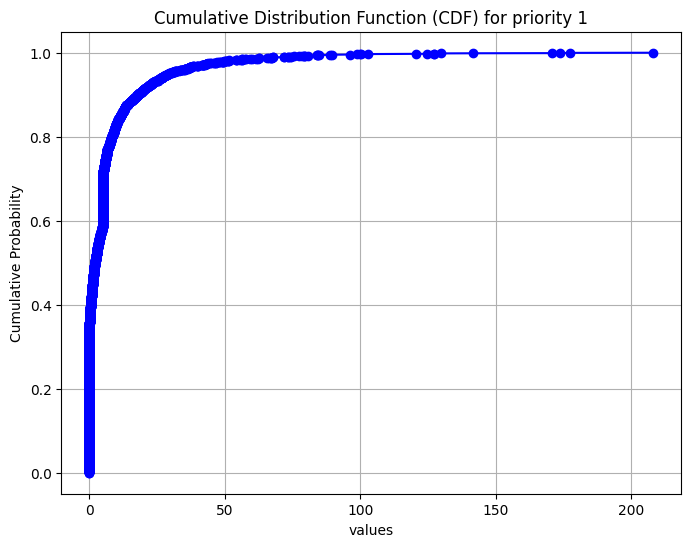

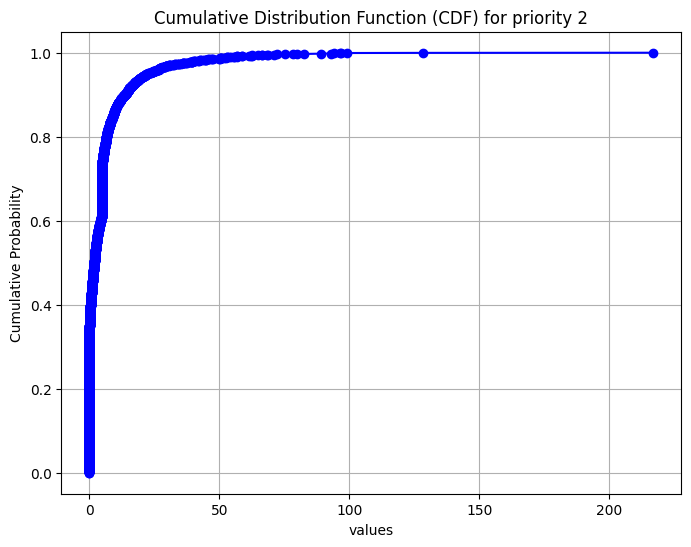

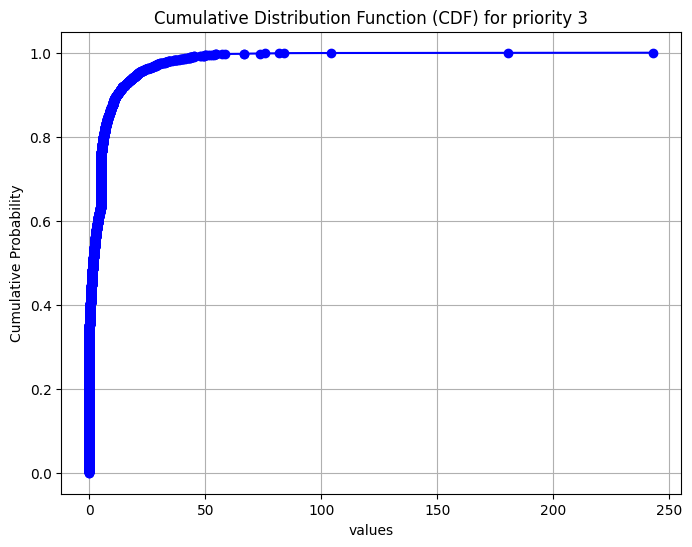

In [114]:
print("simulate using WRR queue")
simulate(tasks2, lambda1, lambda2, t, T, C, N, P, WRR)

simulate using NPPS queue
Average of queue length: 1.5777709642789624
Average of car queue length: 0.769006271222782
Average time spend in all queues: 6.3795998671043685
Average time spend in queue: 4.895436320891653
Average time spend in car queue: 4.487956876715606
Performance of processor 0 :0.6534200859780854
Performance of processor 1 :0.5242789735084759
Performance of car processor: 0.5919562293025964


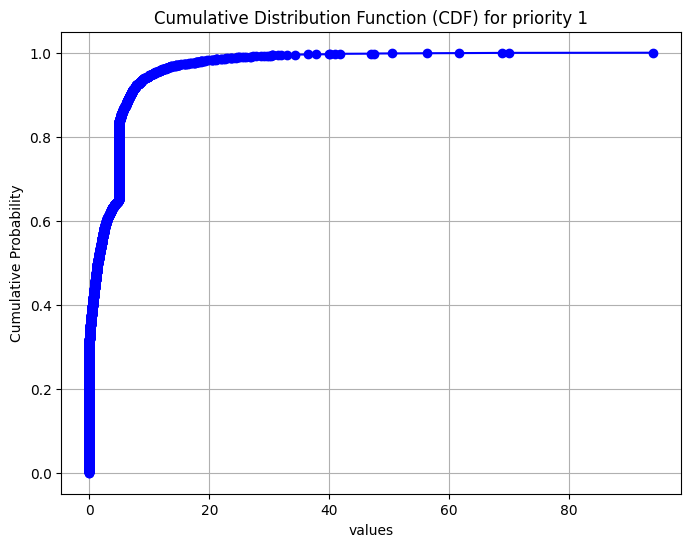

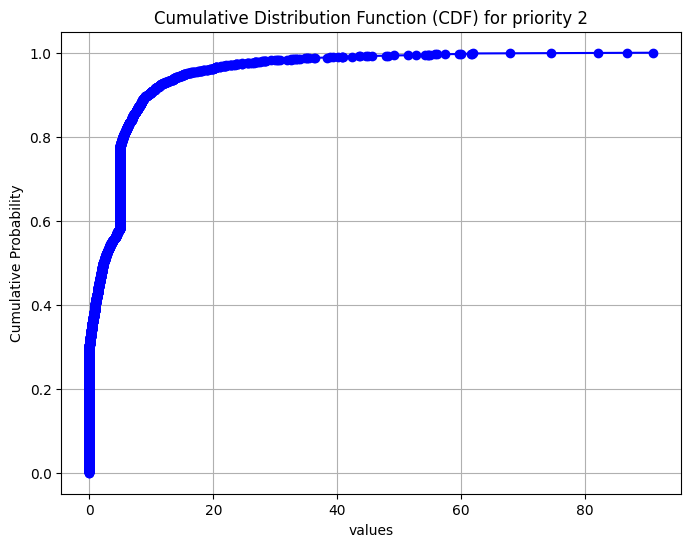

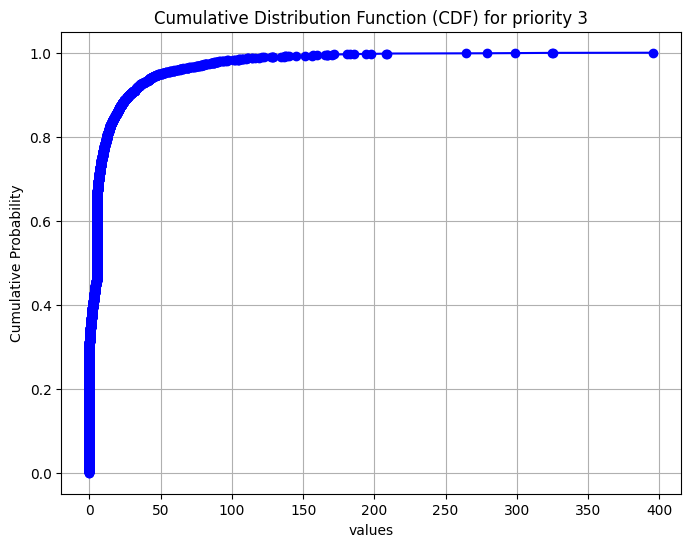

In [115]:
print("simulate using NPPS queue")
simulate(tasks3, lambda1, lambda2, t, T, C, N, P, NPPS)

**solution to increase utility**

سیستمی که ما طراحی کرده ایم، با یک احتمال ثابت تسک ها را به سمت ماشین پارک شده می فرستد. می توان با طراحی این احتمال به صورت داینامیک، هنگامی که لود زیادی روی صف اصلی سیستم وجود دارد، بخش بیشتری از آن را به سمت ماشین پارک شده فرستاد تا از لود کنترلر کاسته شود. بدین صورت بهره وری سیستم افزایش خواهد یافت

**choose best policy**

<div dir="rtl">
با توجه به شبیه سازی های انجام شده می توان گفت در NPPS ابتدا به سراغ تسک هایی با اولویت بالاتر میرویم. اما در FIFO مستقل از اولویت هر یک ابتدا به تسک هایی با زمان ورود کمتر می پردازیم.
بنابراین می توان انتظار داشت در NPPS میانگین زمان صرف شده در صف بیشتر باشد.
اما از طرفی تسک های با اولویت بالاتر زودتر انجام می شوند. از آنجایی که مقدار تغییر در میانگین زمان صرف شده در صف ناچیز است، میتوان گفت NPPS عملکرد بهتری دارد و سیاست بهتری است.

</div>

<div dir="rtl">
سیاست WRR نیز به گونه ای میان این دو سیاست قرار میگیرد یعنی هم میانگین زمان صرف شده در صف و هم توجه به اولویت های بالاتر میان دو سیاست قبلی است.
بنابراین می توان گفت WRR بهترین سیاست است چون به نحوه بهتری این trade_off را برقرار کرده است.
</div>


**Effect of lambda and C**

simulate using FIFO queue
Average of queue length: 2.166539781206975
Average of car queue length: 1.204193519811857
Average time spend in all queues: 8.748017825506574
Average time spend in queue: 6.536740144976581
Average time spend in car queue: 5.48664241484441
Performance of processor 0 :0.6592734347302269
Performance of processor 1 :0.5177385077202621
Performance of car processor: 0.6672897857326103


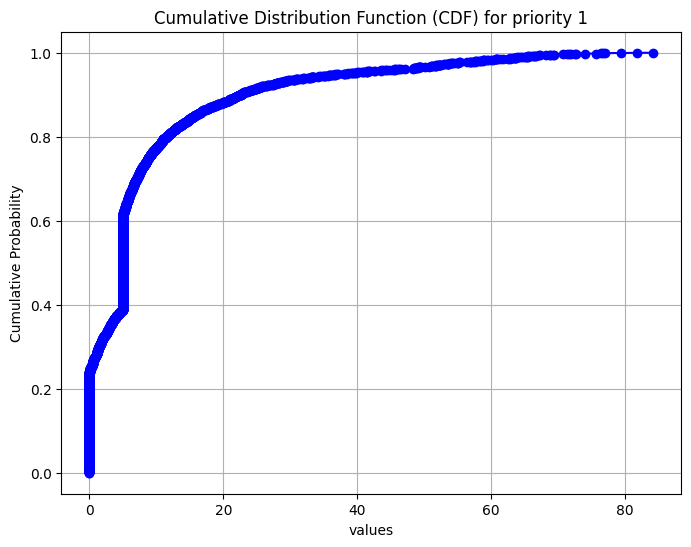

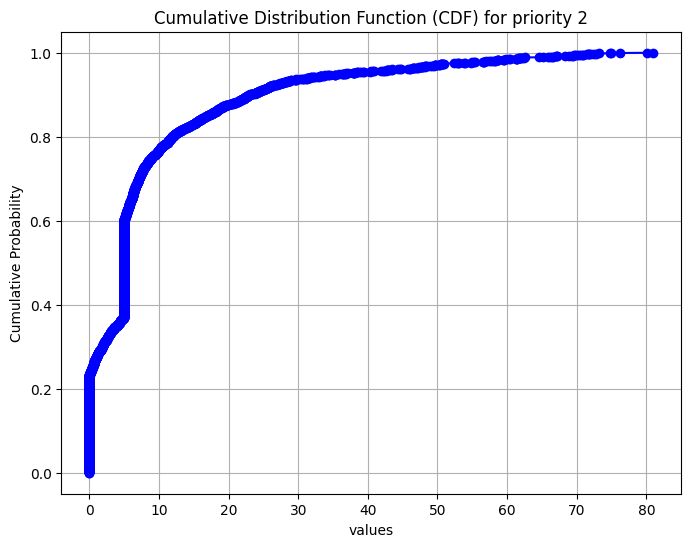

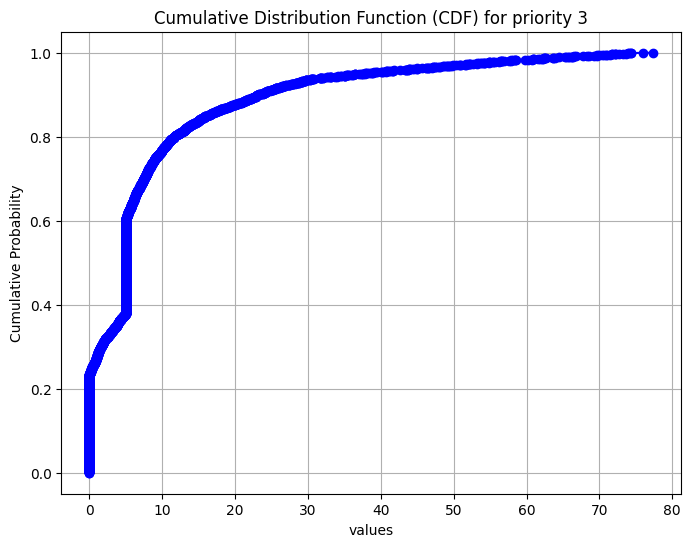

In [116]:
print("simulate using FIFO queue")
simulate(tasks4, lambda1, lambda2, t, T, C, N, P, FIFO)

simulate using FIFO queue increased lambda1 and lambda2
Average of queue length: 1365.1341817186506
Average of car queue length: 1.8121621847714413
Average time spend in all queues: 4059.969097920046
Average time spend in queue: 2137.923365318709
Average time spend in car queue: 4188.413936792801
Performance of processor 0 :0.999994106579614
Performance of processor 1 :0.9995304085791412
Performance of car processor: 0.5415498410799949


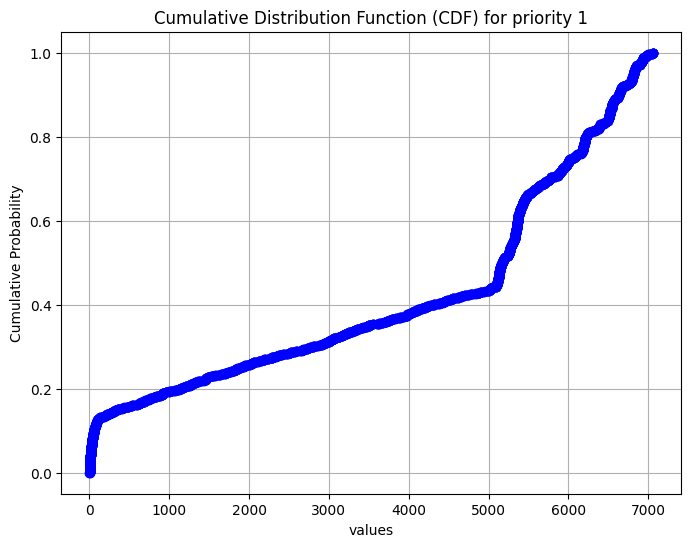

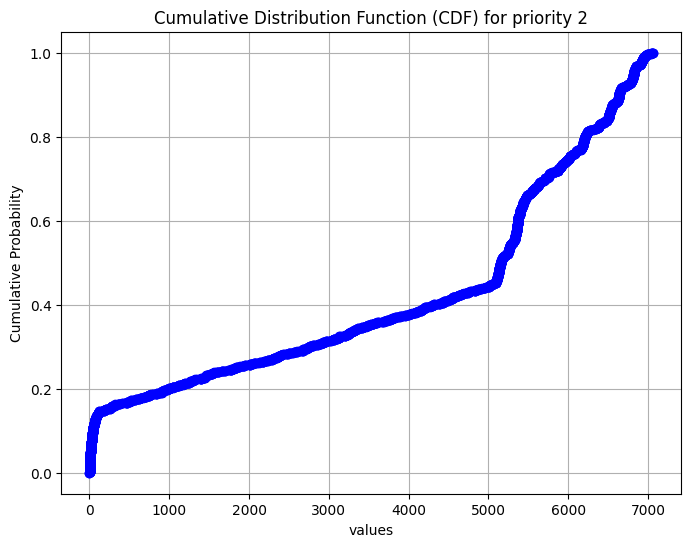

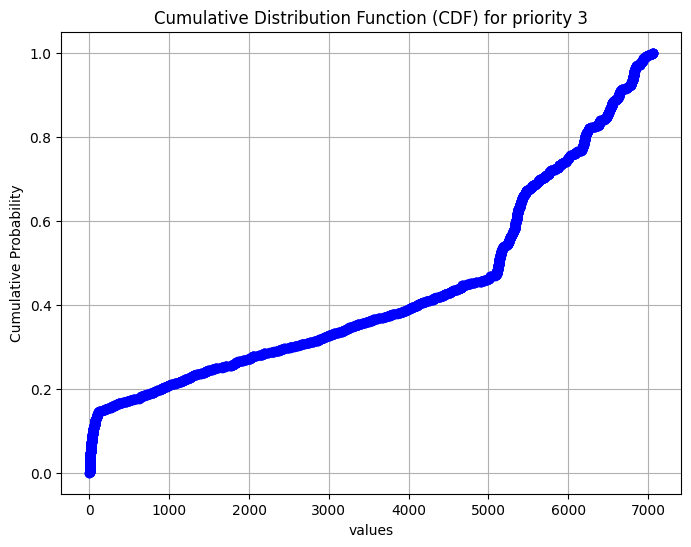

In [117]:
lambda1 = 7
lambda2 = 10
print("simulate using FIFO queue increased lambda1 and lambda2")
simulate(tasks5, lambda1, lambda2, t, T, C, N, P, FIFO)

<div dir='rtl'>
واضح است که با افزایش لاندا سرعت انجام تسک ها افزایش می یابد و به زمان بیشتری برای انجام آنها نیاز است. به صورت شبیه سازی نیز این امر قابل مشاهده است که میانگین زمان صرف شده در صف و میانگین طول صف به شدت افزایش یافته است.
</div>

simulate using FIFO queue increased C
Average of queue length: 1.7591122807519406
Average of car queue length: 1.2028355911642592
Average time spend in all queues: 34.30113044097623
Average time spend in queue: 31.941434874701173
Average time spend in car queue: 4.145620189805621
Performance of processor 0 :0.6670720133307652
Performance of processor 1 :0.5128744650881027
Performance of car processor: 0.6388477287420392


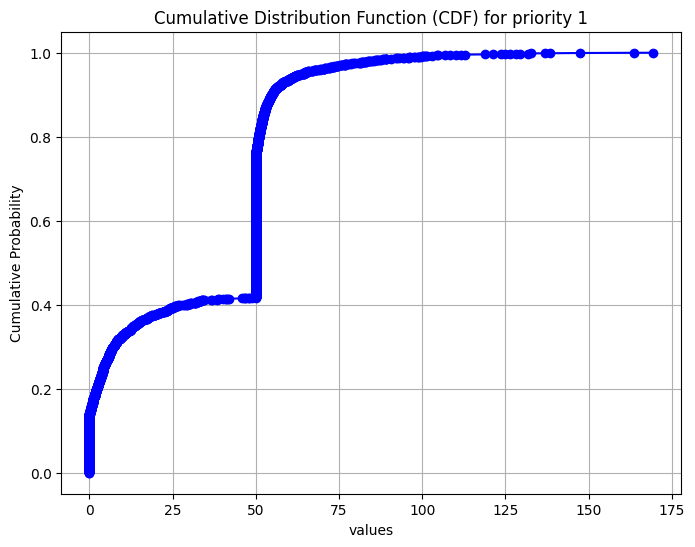

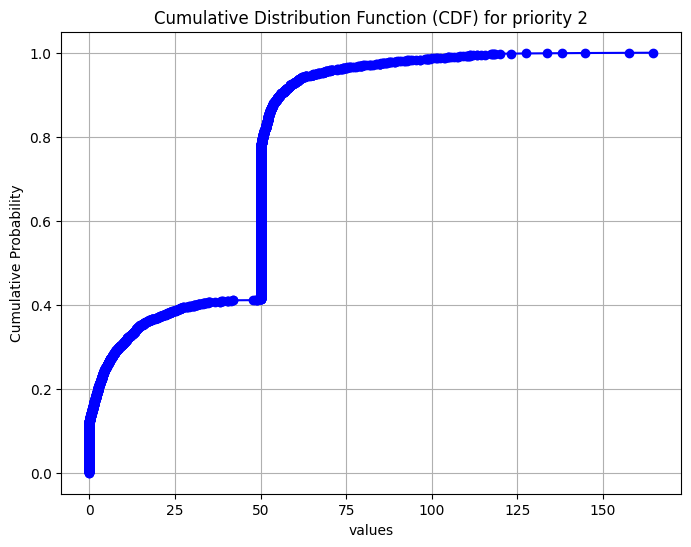

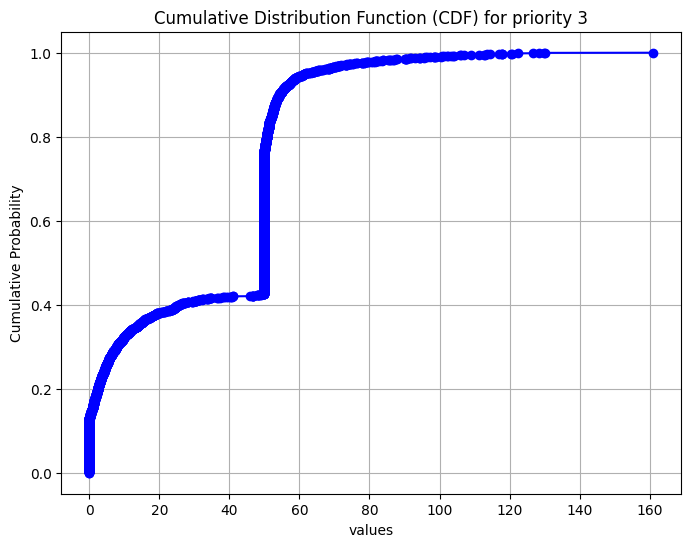

In [121]:
lambda1 = 3
lambda2 = 8
C = 50
print("simulate using FIFO queue increased C")
simulate(tasks6, lambda1, lambda2, t, T, C, N, P, FIFO)

<div dir = 'rtl'>
پارامتر C مقدار زمانی است که هنگام انتقال یک تسک از صف اصلی به صف ماشین پارک شده صرف می شود. بنابراین میتوان انتظار داشت افزایش آن در زمان صرف شده در صف ماشین پارک شده تاثیر چندانی نداشته باشد. اما زمان اجرای تسک ها افزایش می یاد که سبب افزایش در زمان میانگین صرف شده در کل صف ها نیز می شود.
</div>